In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Grades/Grades.csv')

In [3]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [4]:
df.shape

(571, 43)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

# DPS(DATA preProcessing steps)

In [6]:
df1=df.drop(columns='Seat No.',axis=1)
df1

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


# Observations:

# (i) All the variables are "object", except the CGPA which is a number.

# (ii) There are some missing values.

# next: As missing values are categorical. They can be imputed by the mode of the variable.

# Missing values: imputing the missing values by the "mode" of the variable

In [7]:
for column in df1.columns.drop('CGPA'):
    df1[column]=df1[column].fillna(df1[column].mode()[0],inplace=False)

df1    

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     571 non-null    object 
 3   HS-105/12  571 non-null    object 
 4   MT-111     571 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     571 non-null    object 
 7   EL-102     571 non-null    object 
 8   EE-119     571 non-null    object 
 9   ME-107     571 non-null    object 
 10  CS-107     571 non-null    object 
 11  HS-205/20  571 non-null    object 
 12  MT-222     571 non-null    object 
 13  EE-222     571 non-null    object 
 14  MT-224     571 non-null    object 
 15  CS-210     571 non-null    object 
 16  CS-211     571 non-null    object 
 17  CS-203     571 non-null    object 
 18  CS-214     571 non-null    object 
 19  EE-217     571 non-null    object 
 20  CS-212    

In [14]:
df1.nunique().to_frame("No of unique value")

,No of unique value
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12
ME-107,13


In [15]:
for subject in ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']:
    print(f'{subject}=', df1[subject].value_counts())

PH-121= A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
HS-101= A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
CY-105= A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
HS-105/12= A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64
MT-111= A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64
CS-105= A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64
CS-106= A-    118
B+    101
B      96
A      56
B-     54
C

In [18]:
for col in df1.columns.drop('CGPA'):
    df1[col]=df1[col].fillna(df1[col].mode()[0], inplace=False)
df1.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     571 non-null    object 
 3   HS-105/12  571 non-null    object 
 4   MT-111     571 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     571 non-null    object 
 7   EL-102     571 non-null    object 
 8   EE-119     571 non-null    object 
 9   ME-107     571 non-null    object 
 10  CS-107     571 non-null    object 
 11  HS-205/20  571 non-null    object 
 12  MT-222     571 non-null    object 
 13  EE-222     571 non-null    object 
 14  MT-224     571 non-null    object 
 15  CS-210     571 non-null    object 
 16  CS-211     571 non-null    object 
 17  CS-203     571 non-null    object 
 18  CS-214     571 non-null    object 
 19  EE-217     571 non-null    object 
 20  CS-212    

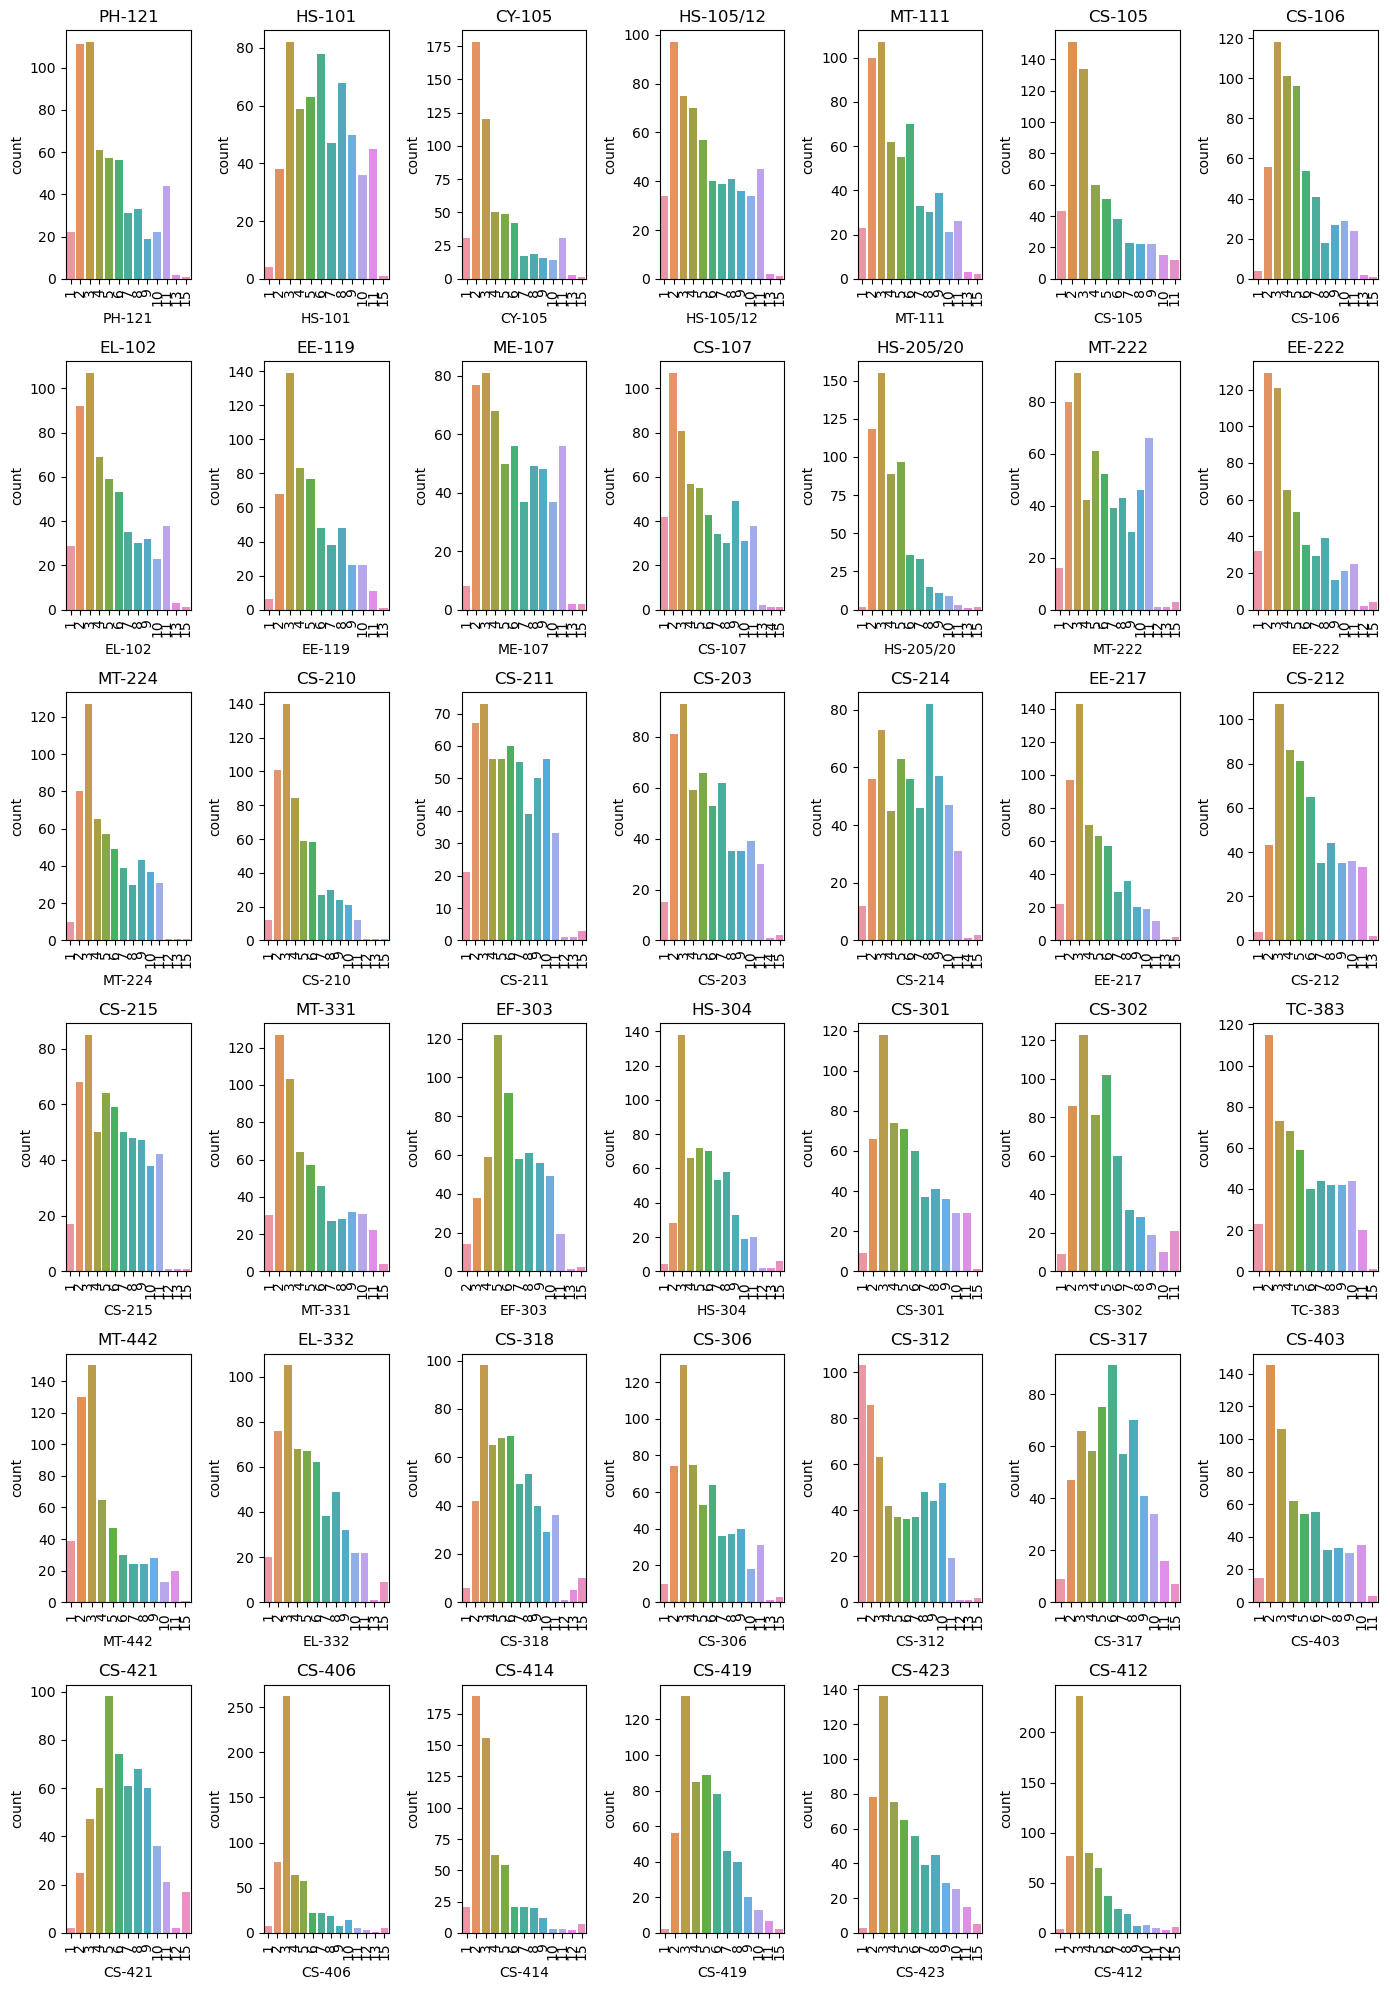

In [33]:

# plt.figure(figsize=(20,15),facecolor="red")

sub = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
            'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
            'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
            'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
            'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
            'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
plt.figure(figsize=(14,20))
num_plots = len( sub )
num_cols = 7  
num_rows = -(-num_plots // num_cols)  

for i, sub in enumerate(sub, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=sub, data=df1)
    plt.title(sub)
    plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

In [29]:
# Categorical to numerical

In [26]:
df1.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [27]:
grades=df1[['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']].values.flatten()

grade_count=pd.Series(grades).value_counts()
grade_count
        

A-    4644
A     3535
B+    2724
B     2702
B-    2221
C     1612
C+    1556
C-    1341
D+    1141
D     1023
A+     726
F      121
WU      41
W       21
I        3
dtype: int64

In [ ]:
#  There are 15 different grades.

In [28]:
grade_mapping = {'A+': 1, 'A':2, 'A-': 3, 'B+': 4, 'B': 5, 'B-': 6, 'C+': 7, 'C': 8,
                 'C-': 9, 'D+': 10, 'D': 11, 'W': 12, 'WU': 13, 'I': 14, 'F': 15}

subject = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
            'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
            'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
            'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
            'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
            'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

for i in subject:
    df1[i] = df1[i].map(grade_mapping)
df1.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,6,10,9,8,9,10,11,9,6,9,...,9,9,9,9,3,2,9,5,3,2.205
1,2,11,10,11,6,8,11,2,10,11,...,10,11,8,11,3,6,8,8,5,2.008
2,2,5,2,6,4,2,6,4,3,3,...,5,5,2,8,2,2,2,3,2,3.608
3,11,7,10,11,11,3,10,9,11,7,...,10,8,10,9,6,5,7,7,7,1.906
4,3,3,3,4,2,2,3,4,2,3,...,6,4,4,6,3,2,3,3,2,3.448


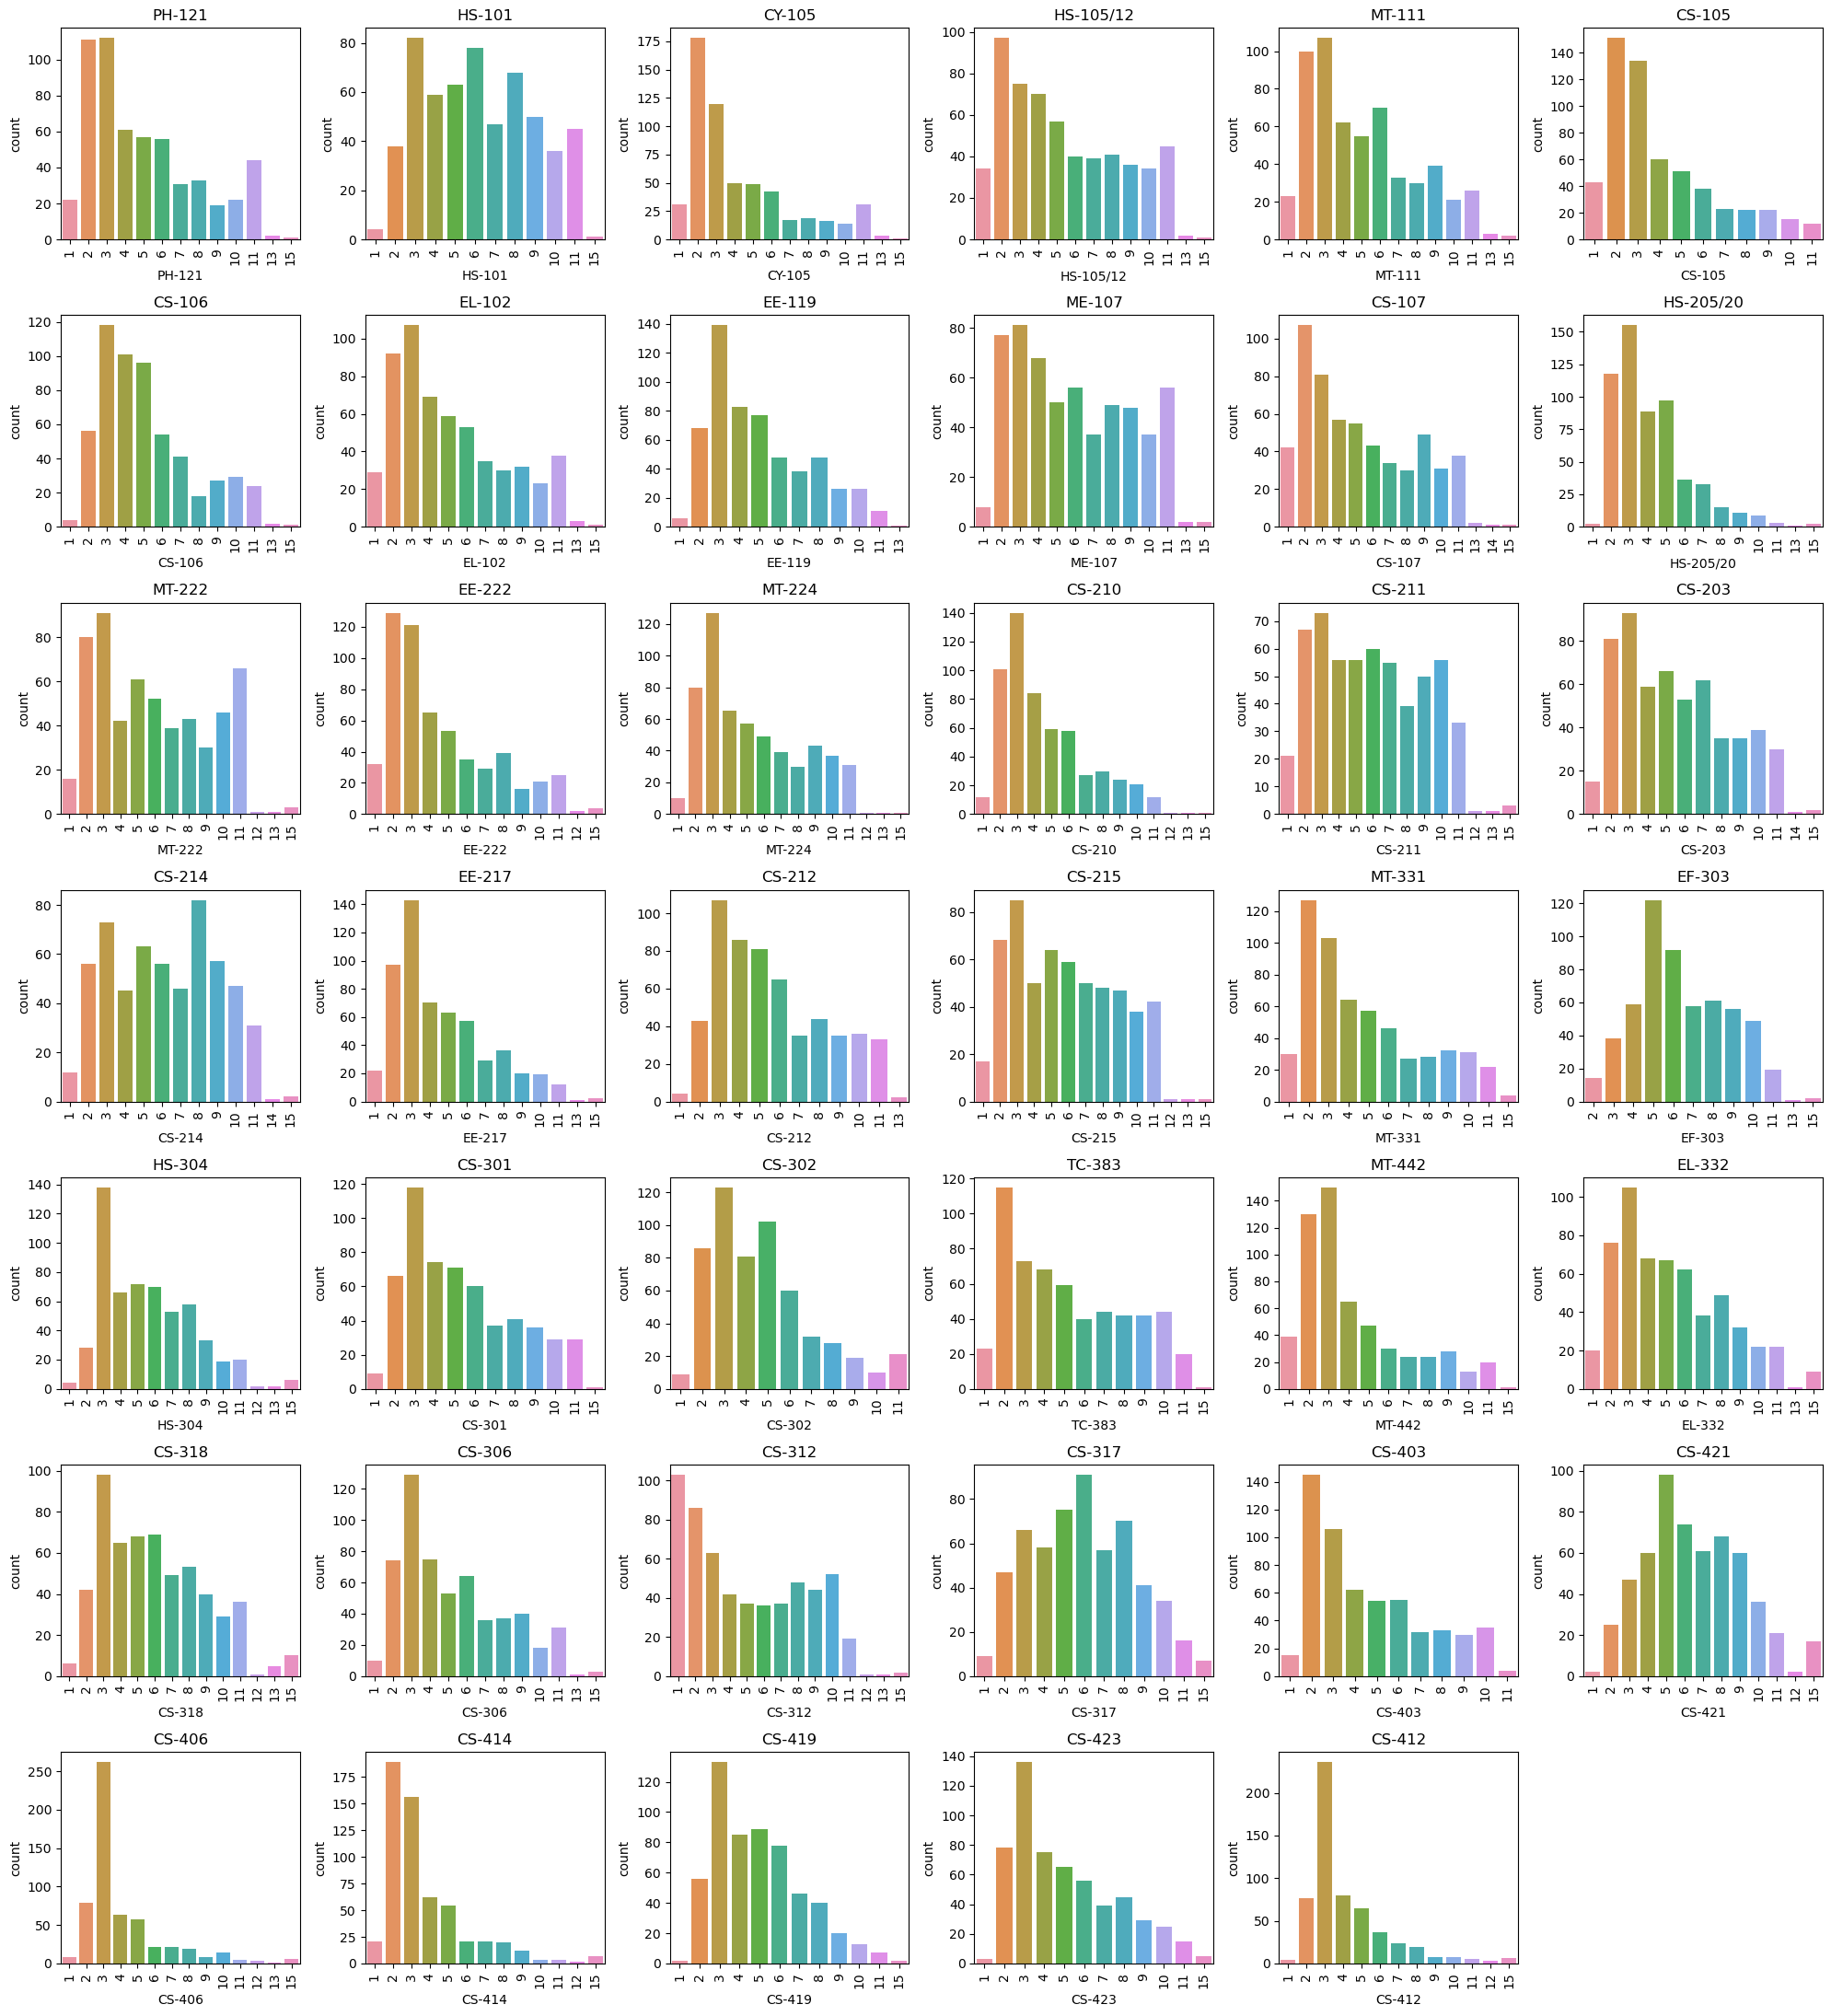

In [29]:
subject = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
            'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
            'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
            'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
            'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
            'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
plt.figure(figsize=(20,22))
for i, subject in enumerate(subject, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=subject, data=df1)
    plt.title(subject)
    plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()

In [ ]:
#Skewness of the features


In [30]:
subject = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
            'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
            'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
            'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
            'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
            'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']
skewness=[]
for i in subject:
    sk=df1[i].skew()
    print(f'{i} = {sk:0.2f}')

PH-121 = 0.79
HS-101 = 0.21
CY-105 = 1.27
HS-105/12 = 0.48
MT-111 = 0.73
CS-105 = 1.12
CS-106 = 0.92
EL-102 = 0.71
EE-119 = 0.72
ME-107 = 0.34
CS-107 = 0.54
HS-205/20 = 1.48
MT-222 = 0.35
EE-222 = 1.05
MT-224 = 0.61
CS-210 = 0.99
CS-211 = 0.26
CS-203 = 0.50
CS-214 = 0.09
EE-217 = 0.99
CS-212 = 0.56
CS-215 = 0.28
MT-331 = 0.89
EF-303 = 0.37
HS-304 = 0.82
CS-301 = 0.62
CS-302 = 0.91
TC-383 = 0.46
MT-442 = 1.15
EL-332 = 0.85
CS-318 = 0.67
CS-306 = 0.76
CS-312 = 0.40
CS-317 = 0.46
CS-403 = 0.72
CS-421 = 0.70
CS-406 = 2.07
CS-414 = 2.11
CS-419 = 0.87
CS-423 = 0.92
CS-412 = 2.07


In [ ]:
# The grades for a number of branch are highly skewed.
# To transform the data in order to reduce the skewness

# Boxcox

In [34]:
from scipy.stats import boxcox
df2=pd.DataFrame()
for i in subject:
    transformed_data, lambda_value = boxcox(df1[i]+1) 
    df2[i]=transformed_data
    sk1=pd.Series(df2[i]).skew()
    print(f'{i} = {sk1:.2f}')

PH-121 = 0.01
HS-101 = -0.07
CY-105 = 0.07
HS-105/12 = -0.04
MT-111 = -0.01
CS-105 = 0.03
CS-106 = 0.01
EL-102 = -0.01
EE-119 = 0.01
ME-107 = -0.06
CS-107 = -0.03
HS-205/20 = 0.04
MT-222 = -0.06
EE-222 = 0.03
MT-224 = 0.00
CS-210 = 0.02
CS-211 = -0.08
CS-203 = -0.04
CS-214 = -0.11
EE-217 = 0.01
CS-212 = -0.01
CS-215 = -0.07
MT-331 = 0.02
EF-303 = -0.02
HS-304 = -0.00
CS-301 = -0.01
CS-302 = 0.01
TC-383 = -0.03
MT-442 = 0.03
EL-332 = -0.01
CS-318 = -0.02
CS-306 = 0.01
CS-312 = -0.06
CS-317 = -0.03
CS-403 = 0.03
CS-421 = -0.01
CS-406 = -0.02
CS-414 = 0.03
CS-419 = 0.00
CS-423 = 0.03
CS-412 = 0.00


In [35]:
# It is clear that after the transformation, skewness of all the variables have considerably reduced.
# Multicollinearity

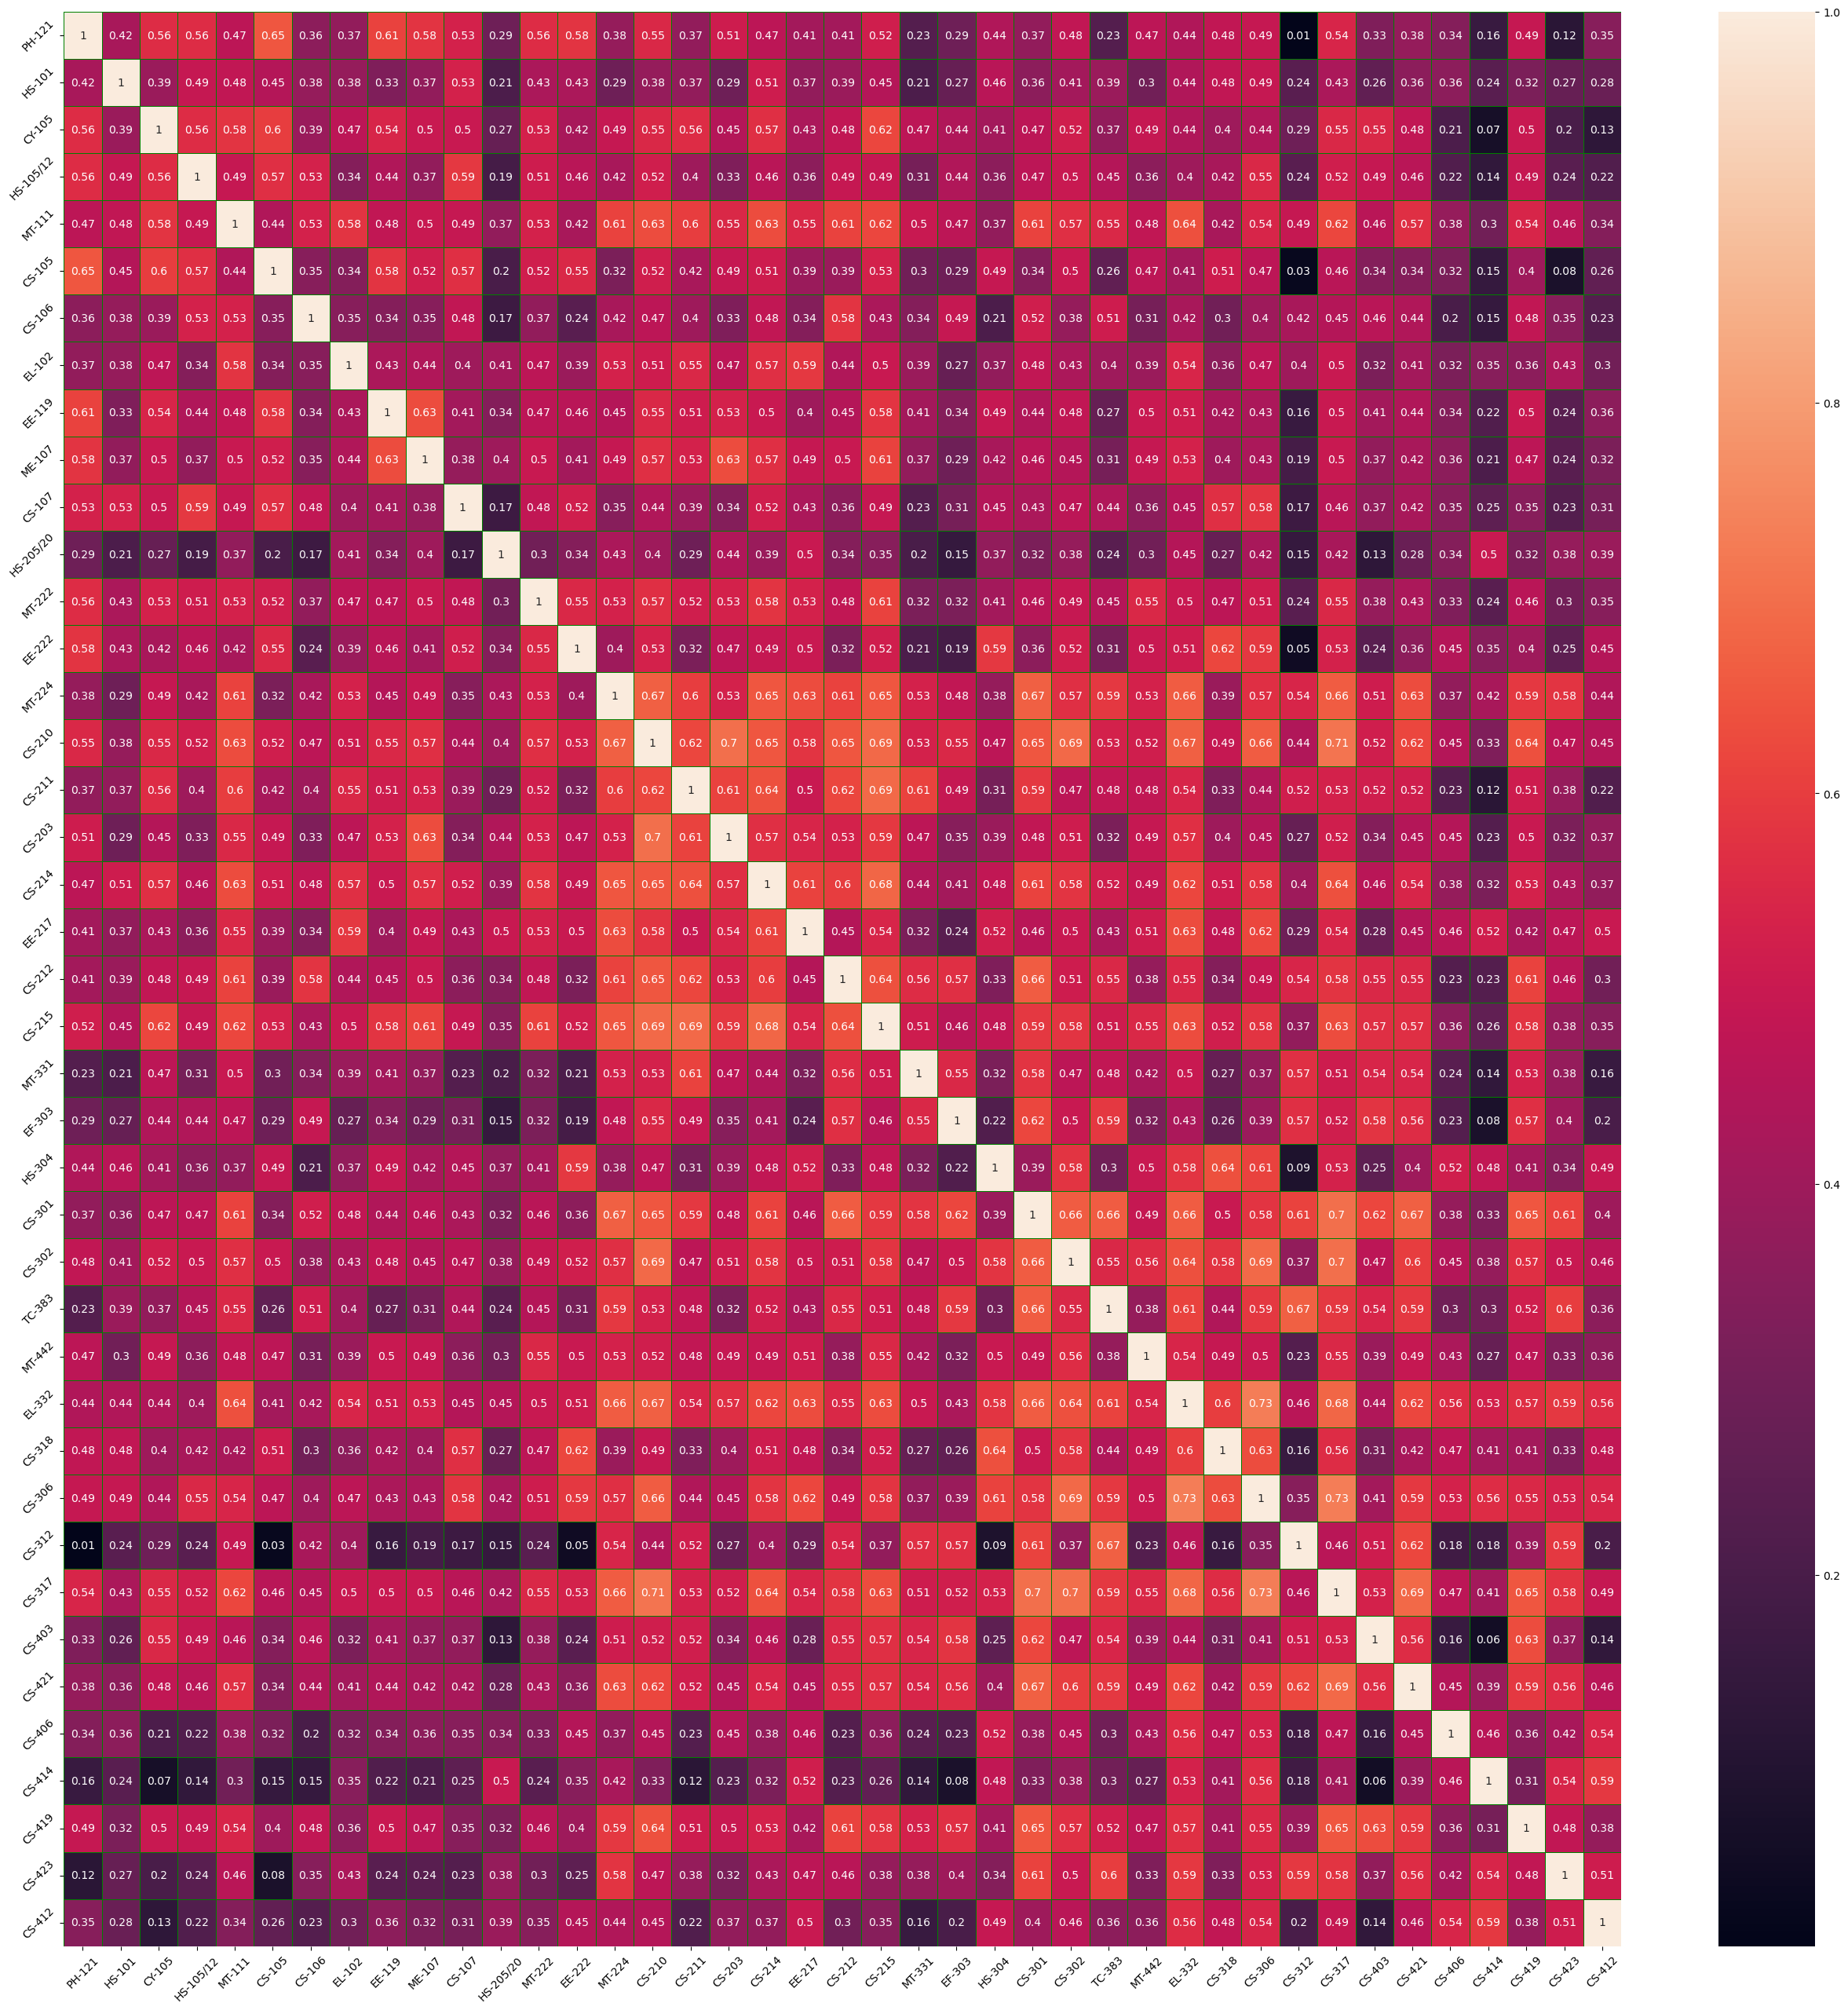

In [40]:
corr_matrix = abs(df2[subject].corr()).round(2)
plt.figure(figsize=(32,32))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, linecolor='green', annot_kws={"size": 10})

plt.xticks(rotation=45) 
plt.yticks(rotation=45)

plt.show()

In [ ]:
# feature and target columns

In [43]:
X=df2[subject]
y=df['CGPA']
X.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,1.791871,4.906383,1.359137,2.785297,2.409107,1.675867,2.052905,2.435133,1.786767,3.376732,...,2.102578,2.945462,4.334730,1.878877,3.441863,0.841480,0.760878,2.145633,1.504580,0.841205
1,1.048333,5.231381,1.388117,3.253484,2.021630,1.579440,2.052905,1.128201,2.159353,3.763164,...,2.364314,3.100049,4.940867,1.809083,3.842225,0.841480,1.050450,2.054002,1.776197,0.956784
2,1.048333,3.020420,0.842519,2.398602,1.661008,0.926726,1.673764,1.673467,1.304205,1.736692,...,1.348210,2.166683,2.904105,0.995191,3.221203,0.733707,0.760878,1.061998,1.209898,0.733510
3,2.237445,3.838987,1.388117,3.253484,2.609264,1.120326,1.993876,2.435133,2.229375,2.932894,...,2.198789,3.100049,4.008917,1.940864,3.441863,0.992272,1.009937,1.950857,1.699563,1.018959
4,1.306881,2.062591,0.995958,1.911528,1.122481,0.926726,1.244197,1.673467,1.046625,1.736692,...,1.348210,2.393131,2.476011,1.394019,2.724701,0.841480,0.760878,1.328335,1.209898,0.733510


In [44]:
X.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,1.545233,3.420868,1.033601,2.108529,1.745129,1.170438,1.508020,1.761508,1.575009,2.533038,...,1.665289,1.972739,3.181024,1.383770,2.784042,0.876593,0.883468,1.622722,1.439031,0.883440
std,0.425203,1.127187,0.218726,0.744721,0.514937,0.284555,0.304178,0.537004,0.351814,0.840594,...,0.419075,0.851493,1.034617,0.342348,0.720276,0.104052,0.138239,0.332761,0.300636,0.098884
min,0.672901,0.840605,0.584525,0.745596,0.702598,0.621853,0.656331,0.704848,0.672205,0.774294,...,0.683537,0.745014,0.828949,0.650975,0.778420,0.533409,0.546510,0.678450,0.647025,0.533313
25%,1.306881,2.563717,0.842519,1.606803,1.424443,0.926726,1.244197,1.433628,1.304205,1.736692,...,1.348210,1.232698,2.476011,0.995191,2.439833,0.841480,0.760878,1.328335,1.209898,0.841205
50%,1.503069,3.443211,0.995958,2.171221,1.661008,1.120326,1.559223,1.673467,1.499509,2.681783,...,1.558258,1.907960,3.297891,1.394019,2.724701,0.841480,0.879373,1.695733,1.375041,0.841205
75%,1.904189,4.212566,1.207467,2.785297,2.166063,1.364711,1.673764,2.187150,1.898405,3.376732,...,1.994537,2.778066,4.008917,1.637068,3.221203,0.957162,0.982910,1.833004,1.699563,0.956784
max,2.466948,6.421329,1.489399,3.750537,2.927997,1.715797,2.242358,2.966256,2.352105,4.419698,...,2.623027,3.738032,6.017521,1.996517,4.524806,1.122168,1.205589,2.547167,2.125543,1.121579


In [ ]:
#Observation: The range of values vary across the features.
#Next: Using Standard Scaler

#Standard Scaler: Scaling the features

In [45]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
scaled.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
count,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,...,5.710000e+02,571.000000,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02,5.710000e+02
mean,3.484273e-16,2.426547e-16,-1.617698e-16,-3.733149e-16,3.857588e-16,4.977532e-16,-3.484273e-16,4.355341e-16,-6.844107e-17,-2.115451e-16,...,5.101971e-16,0.000000,2.239890e-16,6.968545e-16,-4.977532e-16,-9.955065e-16,-7.715175e-16,4.790875e-16,2.986519e-16,-9.955065e-16
std,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,...,1.000877e+00,1.000877,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00,1.000877e+00
min,-2.053362e+00,-2.291124e+00,-2.054943e+00,-1.831730e+00,-2.026357e+00,-1.929562e+00,-2.802426e+00,-1.969420e+00,-2.568391e+00,-2.094099e+00,...,-2.344720e+00,-1.443115,-2.275370e+00,-2.142374e+00,-2.786961e+00,-3.301092e+00,-2.439641e+00,-2.840177e+00,-2.636741e+00,-3.543907e+00
25%,-5.610521e-01,-7.611007e-01,-8.743814e-01,-6.743002e-01,-6.233137e-01,-8.572185e-01,-8.680918e-01,-6.111090e-01,-7.704106e-01,-9.481917e-01,...,-7.572818e-01,-0.869873,-6.820213e-01,-1.136037e+00,-4.783041e-01,-3.377587e-01,-8.875718e-01,-8.854559e-01,-7.628273e-01,-4.274897e-01
50%,-9.924885e-02,1.983949e-02,-1.722518e-01,8.425631e-02,-1.635065e-01,-1.762608e-01,1.684801e-01,-1.640918e-01,-2.147899e-01,1.771077e-01,...,-2.556221e-01,-0.076144,1.130556e-01,2.996306e-02,-8.245798e-02,-3.377587e-01,-2.964841e-02,2.196040e-01,-2.130358e-01,-4.274897e-01
75%,8.449393e-01,7.029814e-01,7.955959e-01,9.095509e-01,8.181639e-01,6.833236e-01,5.453691e-01,7.933190e-01,9.200315e-01,1.004568e+00,...,7.863443e-01,0.946612,8.008946e-01,7.405309e-01,6.074673e-01,7.749924e-01,7.199838e-01,6.324866e-01,8.673641e-01,7.423636e-01
max,2.169605e+00,2.664236e+00,2.085697e+00,2.206797e+00,2.299129e+00,1.918213e+00,2.416290e+00,2.245430e+00,2.210763e+00,2.246406e+00,...,2.287367e+00,2.074992,2.743995e+00,1.791403e+00,2.418922e+00,2.362181e+00,2.332226e+00,2.780545e+00,2.285532e+00,2.410388e+00


In [ ]:
Observation: after scaling all the features are within similar range.
Next: Data set is ready for model building.

Model building

In [46]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,make_scorer
from sklearn.model_selection import cross_val_score,GridSearchCV

In [ ]:
#Random state: To estimate the best random state

In [48]:
from sklearn.model_selection import train_test_split
r2_max=0
r_state=0
LR=LinearRegression()
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=i)
    
    model_LR=LR.fit(X_train,y_train)
    y_pred_LR=model_LR.predict(X_test)
    r2_LR=r2_score(y_test,y_pred_LR)
    if r2_LR>r2_max:
        r2_max=r2_LR
        r_state=i
print(f'R2 score: {r2_max}')
print(f'Random state: {r_state}')
     

R2 score: 0.9469658088613369
Random state: 454


In [ ]:
# Train Test Split: Based on the random state = 454

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=454)

In [51]:
X_train.shape

(342, 41)

In [52]:
X_test.shape

(229, 41)

In [ ]:
# Linear Regression

In [63]:
LR=LinearRegression()
build=LR.fit(X_train,y_train)
y_pred=build.predict(X_test)
r2=r2_score(y_pred,y_test)
MAE=mean_absolute_error(y_pred,y_test)
MSE=mean_squared_error(y_pred,y_test)
cv_score=cross_val_score(LR,X_train,y_train,cv=10).mean()  
print(f'      r2 score: {r2}')
print(f'Mean absolute : {MAE}')
print(f'  Mean square : {MSE}')
print(f'Cross validation: {cv_score}')

      r2 score: 0.9356135700759688
Mean absolute : 0.12313971011547191
  Mean square : 0.024538216500210746
Cross validation: 0.8481689205867882


In [ ]:
# Decission Tree Regression

In [64]:
DT=DecisionTreeRegressor()
build_DT=DT.fit(X_train,y_train)
y_pred_DT=build_DT.predict(X_test)
r2=r2_score(y_pred_DT,y_test)
MAE=mean_absolute_error(y_pred_DT,y_test)
MSE=mean_squared_error(y_pred_DT,y_test)
cv_score=cross_val_score(DT,X_train,y_train,cv=10).mean()  
print(f'      r2 score: {r2}')
print(f'Mean absolute : {MAE}')
print(f'  Mean square : {MSE}')
print(f'Cross validation: {cv_score}')

      r2 score: 0.8080673765125581
Mean absolute : 0.19319650655021836
  Mean square : 0.06758477729257642
Cross validation: 0.7713947393660785


In [ ]:
#Random Forest Regression

In [65]:
RF=RandomForestRegressor()
build_RF=RF.fit(X_train,y_train)
y_pred_RF=build_RF.predict(X_test)
r2=r2_score(y_pred_RF,y_test)
MAE=mean_absolute_error(y_pred_RF,y_test)
MSE=mean_squared_error(y_pred_RF,y_test)
cv_score=cross_val_score(RF,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'      r2 score: {r2}')
print(f'Mean absolute : {MAE}')
print(f'  Mean square : {MSE}')
print(f'Cross validation: {cv_score}')

      r2 score: 0.9480064762670558
Mean absolute : 0.09626978165938867
  Mean square : 0.0160498946393013
Cross validation: 0.916947189968317
